In [1]:
import json
from scSpatial import Embryo
from IPython.display import display

with open('data/corresptissues.json') as f:
    corres_tissues = json.load(f)
    corres_tissues = {eval(k): v for k, v in corres_tissues.items()}
with open('data/tissuescolor.json') as f:
    colors_paper = json.load(f)
    colors_paper = {eval(k): v for k, v in colors_paper.items()}
%matplotlib inline

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Setting up parameters

In [2]:
# Path to the input data
data_path = 'data/E8.5.h5ad'
# Path to the output folder
output_folder = 'out/'

# Set of genes that will be interpolated
genes_of_interest = ['Cck', 'Cnn1', 'Hbb-bh1', 'Nppa', 'Nppb', 'Tdgf1', 'Thbs4', 'Tnni3']

# List of tissues that are ignored to do coverslip registration
tissues_to_ignore = [13, 15, 16, 22, 27, 29, 32, 36, 40, 41]

# Coverslips to ignore
# on the starting side
nb_CS_begin_ignore = 0
# on the ending side
nb_CS_end_ignore = 2

# Gives more weight to some tissues to help the alignment
tissue_weight = {21:1000, 18:1}
# xy resolution
xy_resolution = .6
# Distance max that two beads can be linked together between coverslips
th_d = 150
# Threshold bellow which the beads will be considered noise.
# Value between 0 (all beads taken) and 1 (almost no beads taken)
outlier_threshold = .1

# Number of interpolated layers between two consecutive coverslips
nb_interp = 5

# Loading the embryo

In [3]:
embryo = Embryo(data_path, tissues_to_ignore, corres_tissues, tissue_weight=tissue_weight,
                xy_resolution=xy_resolution, genes_of_interest=genes_of_interest,
                nb_CS_begin_ignore=nb_CS_begin_ignore, nb_CS_end_ignore=nb_CS_end_ignore,
                store_anndata=True)
embryo.removing_spatial_outliers(th=outlier_threshold)
embryo.reconstruct_intermediate(embryo, th_d=th_d, genes=genes_of_interest)

### Pre-processing the differential expression values
It can take a decent amount of time.

Moreover, it is likely that using a computer with decent amount of RAM is better

The list `tissues_to_process` contains the list of tissue ids that will be processed.

`th_vol` relates to the ratio of expressing cells over total number of cells for a given tissue. Any gene that have an expression volume ratio lower than `th_vol` or higher than `1-th_vol` is discarded.

`all_genes` specify if one wants to work to either all the genes (using the `anndata.raw` array) or "only" the variable genes identified by the previous analysis.

Setting `th_vol` to `0` will consider all the genes. **It is not recommended.**

A value of `0.025` as in the following example means that the gene expression volume has to be higher than 2.5% and lower than 98.5% of the total volume of the tissue.

The function `get_3D_differential_expression` returns a Pandas dataframe that one could work with if wanted.

This dataframe can also be found later at `embryo.diff_expressed_3D`.

In [4]:
tissues_to_process = [5, 10, 12, 18, 21, 24, 30, 31, 33, 34, 39]
th_vol = .025
_ = embryo.get_3D_differential_expression(tissues_to_process, th_vol, all_genes=False);

/home/guignard/miniconda3/envs/sc3D/lib/python3.8/site-packages/scSpatial/scSpatial.py:1175: RuntimeWarning: invalid value encountered in true_divide
  mean1 = np.cumsum(hist * bin_centers) / weight1
/home/guignard/miniconda3/envs/sc3D/lib/python3.8/site-packages/scSpatial/scSpatial.py:1176: RuntimeWarning: invalid value encountered in true_divide
  mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]
/home/guignard/miniconda3/envs/sc3D/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/guignard/miniconda3/envs/sc3D/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


volume 892
avg_nb_neighbs 892
Distance_to_reg 892
Interesting genes 892
Gene names 892
volume 987
avg_nb_neighbs 987
Distance_to_reg 987
Interesting genes 987
Gene names 987
volume 908
avg_nb_neighbs 908
Distance_to_reg 908
Interesting genes 908
Gene names 908
volume 848
avg_nb_neighbs 848
Distance_to_reg 848
Interesting genes 848
Gene names 848
volume 962
avg_nb_neighbs 962
Distance_to_reg 962
Interesting genes 962
Gene names 962
volume 842
avg_nb_neighbs 842
Distance_to_reg 842
Interesting genes 842
Gene names 842
volume 738
avg_nb_neighbs 738
Distance_to_reg 738
Interesting genes 738
Gene names 738
volume 801
avg_nb_neighbs 801
Distance_to_reg 801
Interesting genes 801
Gene names 801
volume 887
avg_nb_neighbs 887
Distance_to_reg 887
Interesting genes 887
Gene names 887
volume 972
avg_nb_neighbs 972
Distance_to_reg 972
Interesting genes 972
Gene names 972
volume 822
avg_nb_neighbs 822
Distance_to_reg 822
Interesting genes 822
Gene names 822


If one wants to add a tissue to the set of tissues already treated, it can be done easily and will be much faster since all the pre-processing is stored.

In [5]:
_ = embryo.get_3D_differential_expression([30], th_vol);

### Plotting the top `nb_genes` differentially expressed
The method `plot_top_3D_diff_expr_genes` allows to plot the top `nb_genes` that are spatially differentially expressed in a set of tissues `tissues_to_process`.

One can also allow or not gene repetition by changing the argument `repetition_allowed` from `False` to `True`. The default value is `False` meaning that repetitions are **not** allowed.

One can also decide to plot the original values or the z-scored values by changing the argument `compute_z_score`. Its value is `True` by default meaning that the z-score is plotted.

Ultimately, one can provide a matplotlib figure and a matplotib axis through the arguments `fig` and `ax`. By default none are specified and they are created within the function and returned by the function.

You asked to plot tissue(s) that were not already processed
The following tissue(s) will be ignored:
	 - id: 32, name: angioblasts


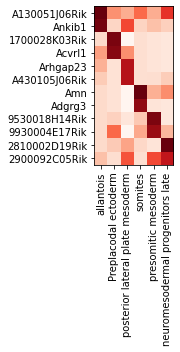

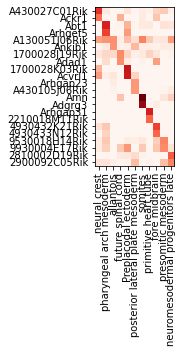

In [6]:
# Note that not all the tissues have to be plotted. Also, if a tissue asked
# has not already been computed, the function informs the user about it.
embryo.plot_top_3D_diff_expr_genes(tissues_to_process[:4]+[30, 31, 32], nb_genes=2);

# All the tissues plotted, 4 genes per tissues, repetition allowed,
# and the original values are plotted (not z-scored)
fig, ax = embryo.plot_top_3D_diff_expr_genes(tissues_to_process, nb_genes=2,
                                             repetition_allowed=False, compute_z_score=False,
                                             output_path='3D_diff_expr.pdf');

### Other visualization tools
Two other functions allow to visualize the 3D differentially expressed genes.

First `plot_volume_vs_neighbs` which allows to the relative volume occupied by expressing cells against their relative density for a given tissue.

The second function, `print_diff_expr_genes` allow to print the top `nb` genes for a given tissue

---
The function `plot_volume_vs_neighbs` takes as arguments at least a tissue `id`.

On top of that can be given a list of genes to identify on the plot through the argument `print_genes`.

The top _x_ genes can also be identified using the argument `print_top`

An `output_path` to the file in which to save the generated figure can be provided too.

Moreover, one can add keyword arguments to the function that will be forwarded to the `scatterplot` function from Seaborn. (see example below)

---
The function `print_diff_expr_genes` takes as arguments the tissue to display and the number of top genes to display

,volume,avg_nb_neighbs,Distance_to_reg,Interesting genes,Gene names
160,0.092282,0.162121,0.224745,484,Cpn1
177,0.443512,0.311160,0.177081,529,Cyp26a1
601,0.082774,0.131757,0.172406,1859,Rhox5
323,0.135347,0.157025,0.171299,1082,Hes3
223,0.108501,0.140464,0.164413,656,Epcam
488,0.205817,0.185462,0.158751,1488,Nin
319,0.180649,0.172601,0.157723,1074,Hbb-bh1
748,0.029083,0.096154,0.153580,2237,Trap1a
389,0.151007,0.155556,0.152647,1200,Irx3
318,0.195190,0.171920,0.141795,1073,Hba-x


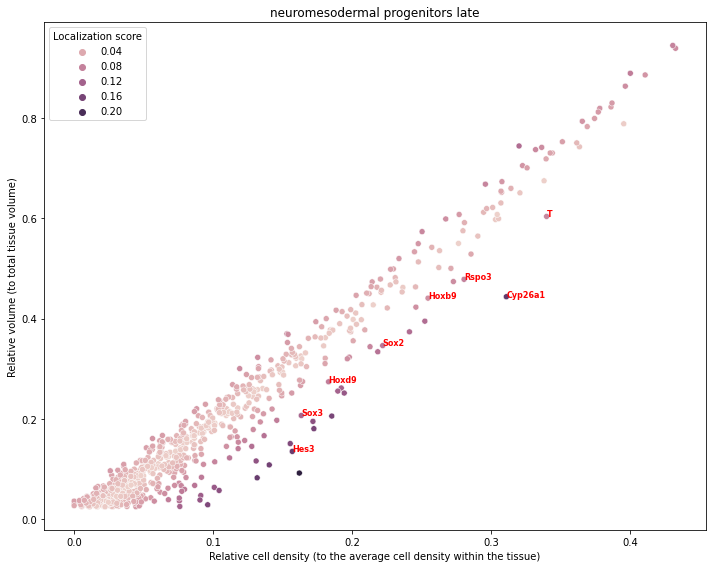

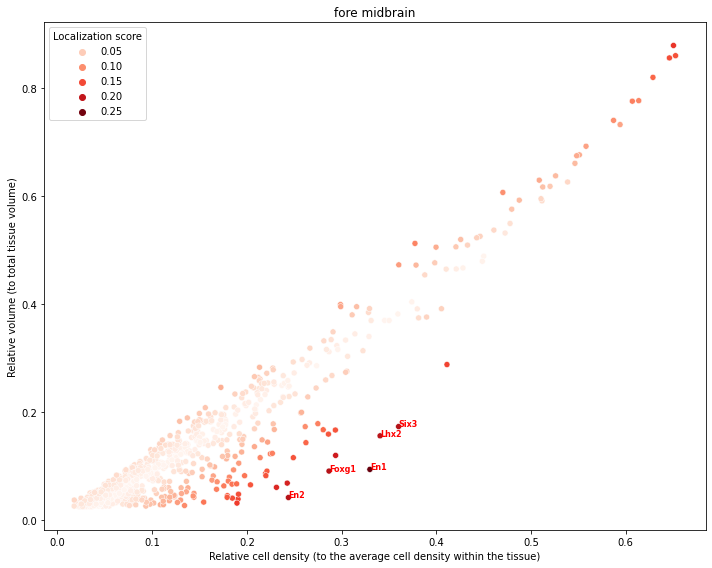

In [7]:
# Plotting the distribution for the tissue 31 highlighting a given set of genes
# and saving the figure in Vol_vs_Dens_31.pdf (note that a different path can be provided)
embryo.plot_volume_vs_neighbs(31, print_genes=['T', 'Sox2', 'Sox3',
                                               'Hes3', 'Hoxb9', 'Cyp26a1',
                                               'Rspo3', 'Hoxd9'],
                              output_path=f'Vol_vs_Dens_31.pdf')

# Plotting the distribution for the tissue 24 highlighting the top 5 genes.
# Note that the figure is not saved and that the palette arguments allows
# to give a different colormap for localization score.
embryo.plot_volume_vs_neighbs(24, print_top=5,
                              palette='Reds')

# Compute and display the top 10 genes for the tissue 31.
top_10 = embryo.print_diff_expr_genes(tissue=31, nb=10)
display(top_10)